# Plotting Graphs using Matplotlib

## Contents
+ Loading a CSV file using Pandas
+ Introduction to Matplotlib
+ Understanding parts of a figure
+ Example graphs with pyplot

The contents of this example code are based on the [matplotlib tutorial](https://matplotlib.org/tutorials/index.html).

# Loading a CSV file using Pandas

We will use an example CSV file "brain_size.csv" to demonstrate generation of plots using matplotlib.

In [43]:
import pandas as pd

# use pandas to easily import the csv file
# the first row has column headers: "SrNo","Gender","FSIQ","VIQ","PIQ","Weight","Height", "MRI_Count"
brains = pd.read_csv("brain_size.csv", na_values='.') # you would likely not have any missing values
brains.head()  # just to preview the top few rows

,SrNo,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


# Introduction to Matplotlib

Matplotlib is a Python plotting library that produces high-quality figures in a variety of formats and across platforms. In matplotlib, you can add features one by one, such as adding a title, labels, legends, and more.

Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). 

## Understanding parts of a figure
Let us understand the components of a matplotlib figure to better understand all the terms.

<img src = "https://matplotlib.org/_images/anatomy.png">

[```Figure```](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) constitutes of subplots, sub axis, titles, subtitles, legends, everything inside the plot but an overview. So, Figure object is a box-like container holding one or more Axes (actual plots). An [```Axes```](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes) actually translates into what we think of as an individual plot or graph. The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system. Almost every “element” of a chart has its own manipulable Python object, all the way down to the ticks and labels.

## Introduction to Pyplot

The easiest way to create a new figure is with pyplot. The ```matplotlib.pyplot``` provides a collection of functions which make some change to a figure, e.g. creating a figure, creating a plotting area in a figure, plotting some lines, etc. 

It is important to note that all the plotting functions expect numpy array as input. Classes that are 'array-like' such as pandas data objects and ```numpy.matrix``` will also likely work. But in case they do not work, it is best to convert these to numpy array objects prior to plotting.

<!-- Sometimes Jupyter notebook might need to set ```%matplotlib inline``` to output the plotting commands inline in our notebooks. -->

### Simple Line Plot

Let us plot the "VIQ" column (y-axis) against the "SrNo" column using a line plot.

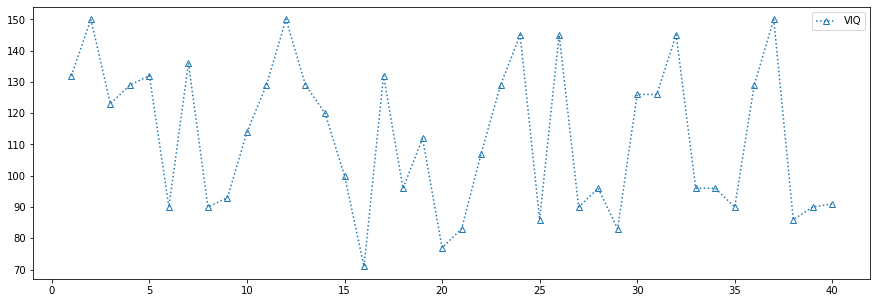

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))  # sets a longer landscape aspect ratio for the figure canvas
y = brains["VIQ"]
x = brains["SrNo"]
plt.plot(x,y, marker='^', linestyle=':', markerfacecolor='none', label='VIQ')
plt.legend() # sets the legend in top-right be default using the labels defined so far

# uncomment the below line to export the plot to a file
# plt.savefig('./line_plot.pdf')

Refer to the [plt.plot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to understand and explore the parameters of the `plt.plot` function.

### Plotting multiple lines along with scatter points, arrows, and text

The following example illustrates how you could plot something similar to Figure 2(a) from the JellyFish paper. 

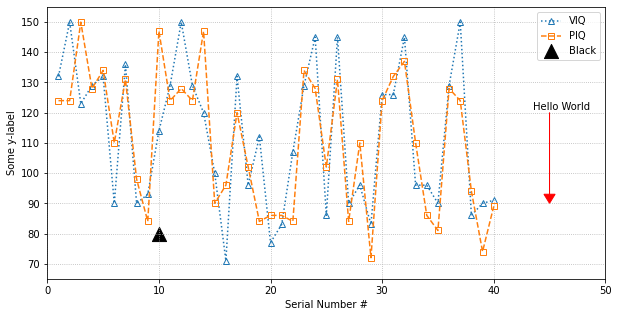

In [45]:
fig, ax = plt.subplots(figsize=(10,5)) # for multiple plots
plt.grid(linestyle=':')

# VIQ line plot
y = brains["VIQ"]
x = brains["SrNo"]
ax.plot(x,y, marker='^', linestyle=':', markerfacecolor='none', label='VIQ')

# PIQ line plot
y = brains["PIQ"]
x = brains["SrNo"]
ax.plot(x,y, marker='s', linestyle='--', markerfacecolor='none', label='PIQ')

# Single point using scatter plot
ax.scatter(10,80, marker='^', c='black', s=200, label='Black')


# Adding an arrow to the plot
plt.arrow(45,120,0,-30, shape='full', length_includes_head=True,
          head_width=1, head_length=3, color='red')

# Adding custom text to the plot
plt.text(43.5, 121, 'Hello World')


# Setting range for the x-axis and the y-axis
ax.axis(xmin=0, xmax=50)
ax.axis(ymin=65, ymax=155)

# Setting xlabel and ylabel
plt.xlabel('Serial Number #')
plt.ylabel('Some y-label')

# Adding legend in the upper right corner
plt.legend(loc='upper right')

# uncomment the below line to export the plot to a file
# plt.savefig('./multi_lines_plot.pdf')

### Simple Bar Plot 

Following code illustrates how we could plot a bar graph similar to Figure 1(c) from the JellyFish paper.

In [46]:
# First, let's prepare some histogram-like data from our loaded CSV file
# In case of Figure 1(c), you would have such a data already ready
ht = brains["Height"].value_counts()
wt = brains["Weight"].value_counts()

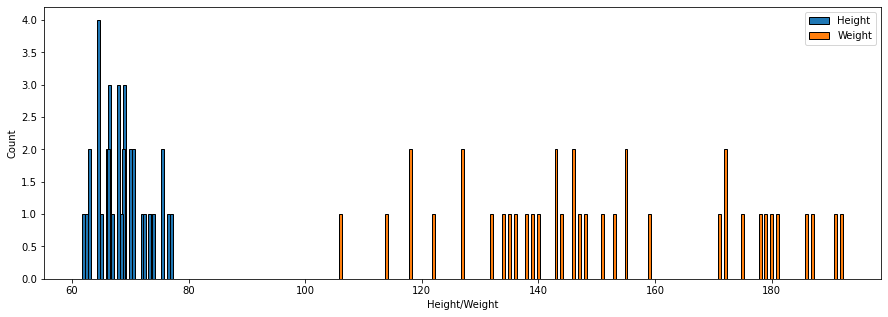

In [48]:
fig, ax = plt.subplots(figsize=(15,5)) # init figure with landscape aspect ratio

# height x and y values
y = ht.values
x = ht.index

# weight x and y values
y2 = wt.values
x2 = wt.index

# Bars for height 
ax.bar(x,y, label='Height', align='center', edgecolor='black', width=0.5)

# Bars for weight
ax.bar(x2,y2, label='Weight', align='center', edgecolor='black', width=0.5)

plt.xlabel('Height/Weight')
plt.ylabel('Count')

plt.legend()

# uncomment the below line to export the plot to a file
# plt.savefig('./bar_plot.pdf')